In [1]:
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from beakerx import *
plt.style.use('ggplot')
import seaborn as sns
sns.set()
import h5py
import os
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/Users/james/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
cd /Users/james/signal

/Users/james/signal


In [3]:
length = np.sqrt(np.random.uniform(0, 1,1000))
angle = np.pi * np.random.uniform(0, 2,1000)
x = length * np.cos(angle)
y = length * np.sin(angle)

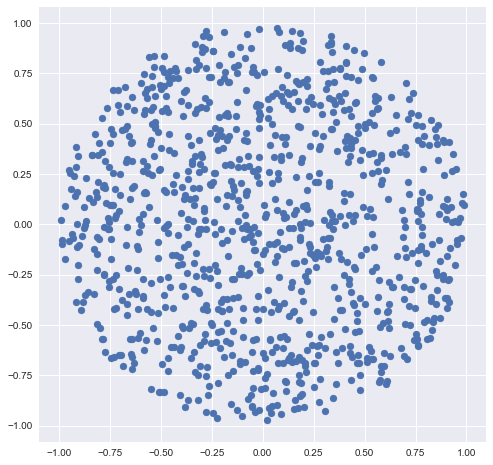

In [4]:
fig,ax=plt.subplots(1,figsize=(8,8))
ax.scatter(x,y)

In [5]:
def sample_round(degree_unit=1,length=0.5,len_unit=0.01):
    '''
    input:
        degree_unit: rotation degree each time
        length: radius
        unit: step length 
    output:
        a circle with center:(0,0)
    '''
    degree_unit_arc = degree_unit/360.*2*np.pi
    numbers_deg = int(360/degree_unit)
    numbers_len = int(length/len_unit)
    degs = np.repeat(degree_unit_arc * np.arange(0,numbers_deg),numbers_len).reshape(numbers_deg,-1)
    lens = np.repeat(len_unit * np.arange(0,numbers_len),numbers_deg).reshape(numbers_len,-1).T
    print lens.shape
    return np.multiply(np.cos(degs),lens),np.multiply(np.sin(degs),lens)

In [6]:
import timeit

(360, 50)
-0.0134830474854


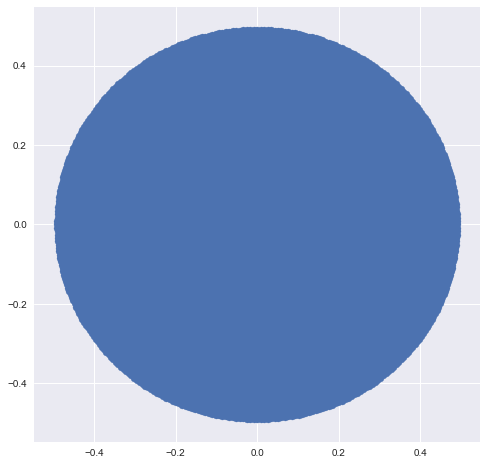

In [8]:
start = timeit.timeit()
a,b=sample_round(degree_unit=1,length=0.5,len_unit=0.01)
fig,ax=plt.subplots(1,figsize=(8,8))
ax.scatter(a,b)
end = timeit.timeit()
print end - start